Importing Libraries Needed

In [ ]:
import pathlib
from PIL import Image

#Data handling
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay

#Deep learnings tools
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Activation , Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#!pip install google-colab
from google.colab import drive

try:
    drive.mount('/content/drive/')
except Exception as e:
    print(f"Error mounting Google Drive: {e}")

Mounted at /content/drive/


In [ ]:
import os
train_data = 'drive/My Drive/Intel_Image/seg_train/seg_train'
test_data = 'drive/My Drive/Intel_Image/seg_test/seg_test'
filepath= []
label =[]

folds = os.listdir(train_data)# list of labels

for fold in folds:# for each labeled folder
    f_path = os.path.join(train_data , fold)# joining directory and sub director
    imgs = os.listdir(f_path)# list of images in new sub directory
    for img in imgs:
        img_path = os.path.join(f_path , img)# new image path
        filepath.append(img_path)# append indidual images in file path
        label.append(fold)#label is the fold or sub folder in training

#Concat data paths with labels
fseries = pd.Series(filepath , name= 'filepaths')
lseries = pd.Series(label , name = 'labels')
train_df = pd.concat([fseries , lseries] , axis = 1)

In [ ]:
train_df
train_df = train_df.sample(int(0.8 * len(train_df)))

In [ ]:
folds_test = os.listdir(test_data)
folds_test

['street', 'sea', 'mountain', 'glacier', 'forest', 'buildings']

In [ ]:
folds_test = os.listdir(test_data)
file_path=[]
for fold in folds_test:
    f_path1 = os.path.join(test_data, fold)#paths to different labels
    imgs = os.listdir(f_path1)# images in test set under each label

    for img in imgs:
        img_path = os.path.join(f_path1 , img)#image
        filepath.append(img_path)
        label.append(fold)



In [ ]:
train_df_T,valid_df=train_test_split(train_df,random_state=32,train_size=0.8)

In [ ]:
df_test=pd.DataFrame(np.column_stack([filepath,label]),columns=['filepaths','labels'])

In [ ]:
print(train_df_T.shape)
print(valid_df.shape)
print(df_test.shape)

(8988, 2)
(2247, 2)
(17044, 2)


In [ ]:
plt.imread(train_df_T.iloc[1,0]).shape

(150, 150, 3)

In [ ]:
plt.imread(train_df_T.iloc[0,0]).shape

(150, 150, 3)

In [ ]:
tr_gen=ImageDataGenerator(rescale=1/255) # Example: Downsample by a factor of 2)
ts_gen=ImageDataGenerator(rescale=1/255)# Example: Downsample by a factor of 2
vl_gen=ImageDataGenerator(rescale=1/255)

In [ ]:
batch_size = 32
train_gen = tr_gen.flow_from_dataframe(train_df_T , x_col = 'filepaths' , y_col = 'labels'  ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size= batch_size,target_size=(150,150))
val_gen=vl_gen.flow_from_dataframe(valid_df,x_col = 'filepaths' , y_col = 'labels'  ,class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size= batch_size,target_size=(150,150))
test_gen=ts_gen.flow_from_dataframe(df_test , x_col = 'filepaths' , y_col = 'labels' , class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size= batch_size,target_size=(150,150))

Found 8988 validated image filenames belonging to 6 classes.
Found 2247 validated image filenames belonging to 6 classes.
Found 17044 validated image filenames belonging to 6 classes.


In [ ]:
train_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
val_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
img_size=[150,150]
def get_model():
 model = models.Sequential()
 model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
 model.add(layers.MaxPooling2D((2, 2)))
 model.add(layers.Conv2D(64, (3, 3), activation='relu'))
 model.add(layers.MaxPooling2D((2, 2)))
 model.add(layers.Conv2D(128, (3, 3), activation='relu'))
 model.add(layers.MaxPooling2D((2, 2)))
 model.add(layers.Flatten())
 model.add(layers.Dense(512, activation='relu'))
 model.add(layers.Dense(len(train_gen.class_indices), activation='softmax'))
 return model

In [ ]:
model_base=get_model()
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
def get_model_alex():
    img_size=[150,150]
    model = models.Sequential()
    model.add(layers.Conv2D(16, (2, 2), activation='relu', input_shape=(img_size[0], img_size[1],3),padding='same'))# increasing the channels /feature mapts to 16
    model.add(layers.MaxPooling2D((2, 2)))# extracting key features
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))# increasing the channels /feature maps
    model.add(layers.MaxPooling2D((2, 2)))# extracting
    model.add(layers.Conv2D(64, (2, 2), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))# dropping neurons
    model.add(layers.Flatten())# flattening *1 D
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dense(len(train_gen.class_indices), activation='softmax'))
    return model

In [ ]:
model_alex=get_model_alex()
model_list=[model_base,model_alex]

In [ ]:
print(model_alex.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 35, 35, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

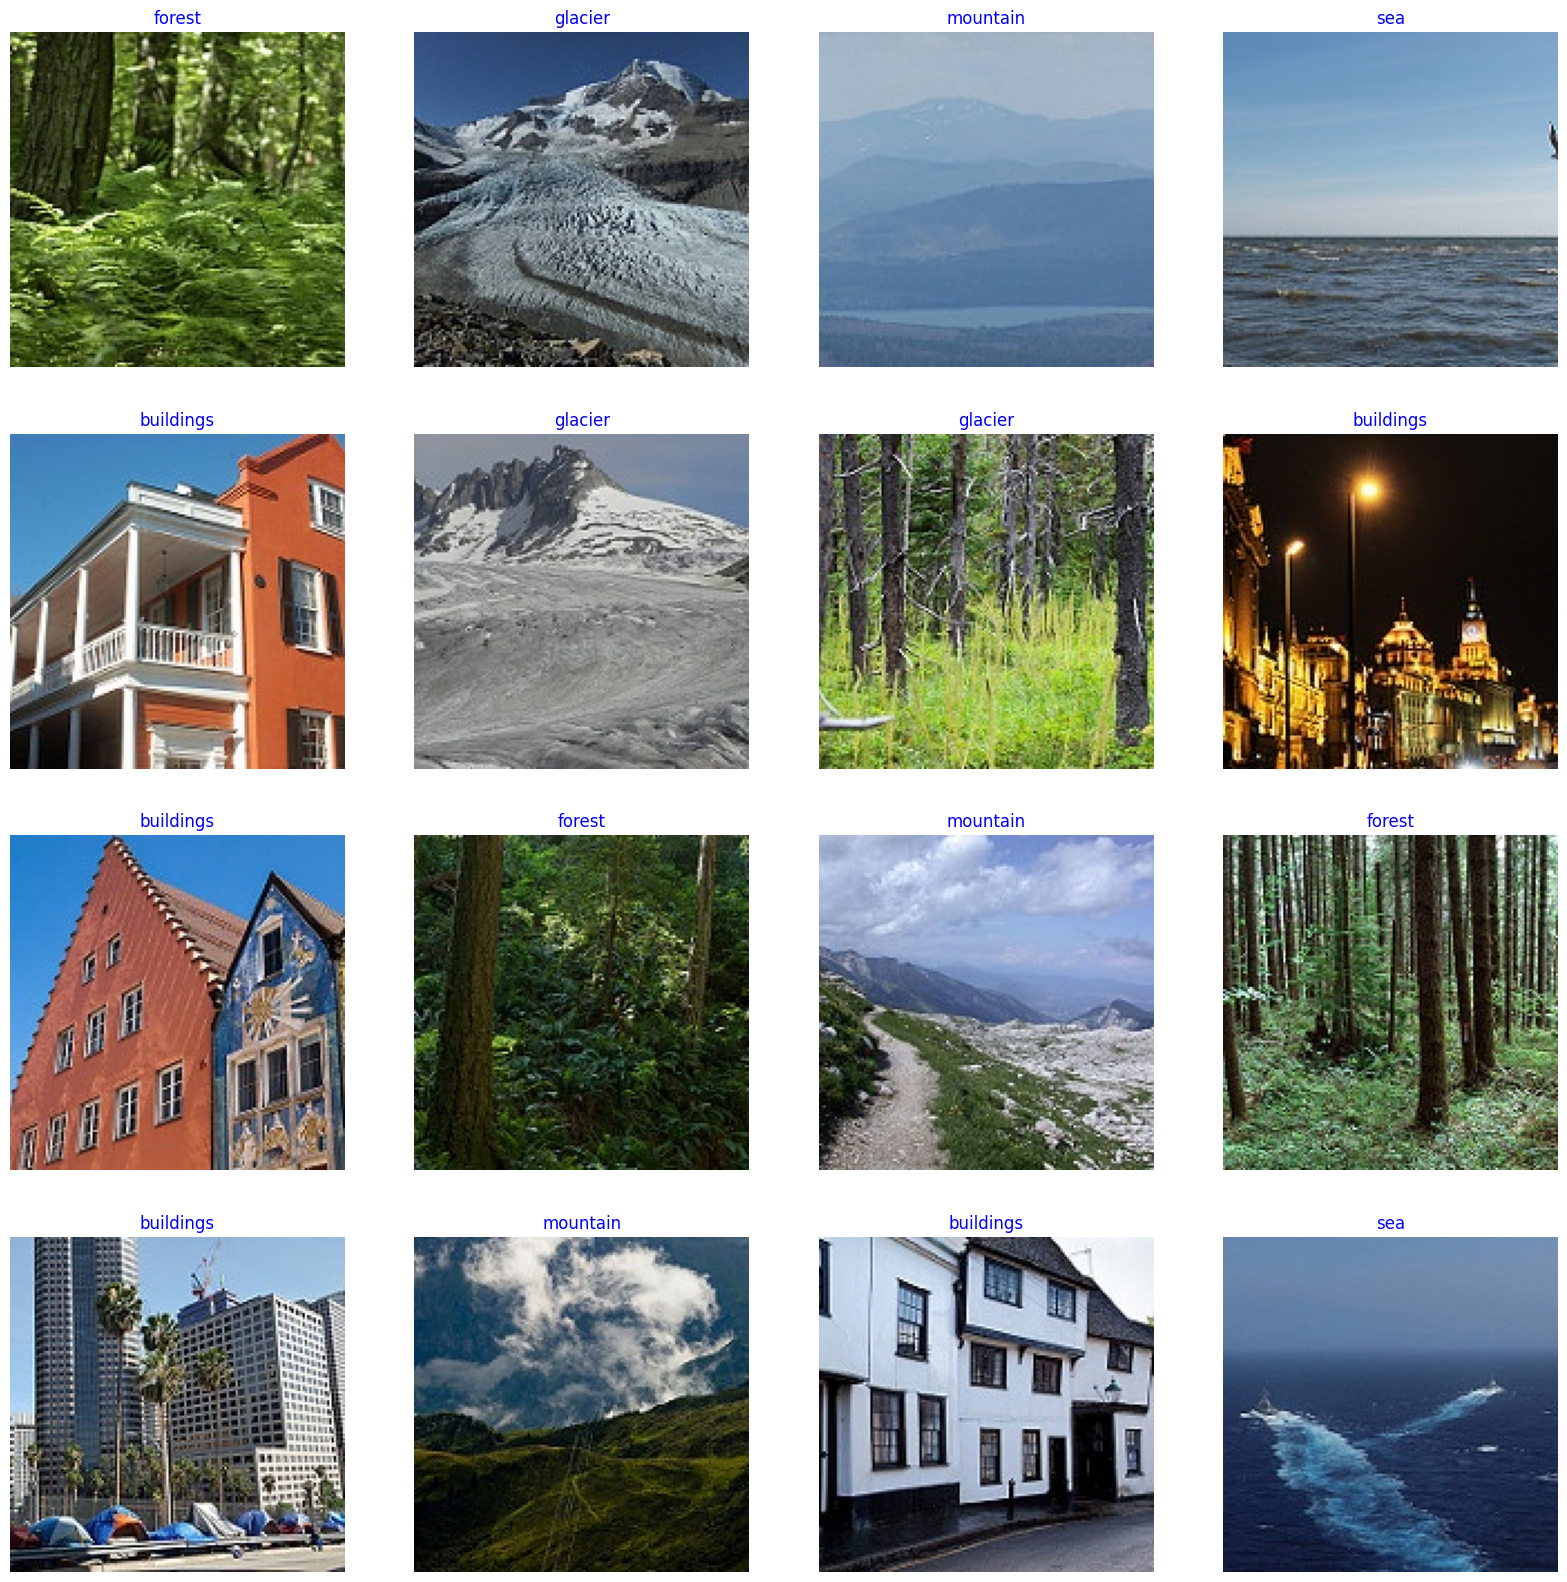

In [ ]:
dict_gen = train_gen.class_indices
classes = list(dict_gen.keys())
images , labels = next(train_gen)

plt.figure(figsize=(20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

In [ ]:
m=150*150
print(m)

22500


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
DS = 4  # Downsample rate, must be a multiple of 22500
im_size = 150  # Default image size
if 225000 % DS != 0:
    print("Downsample rate is not a factor of 22500")
    DS = 1
    im_size = 150  # Default image size
else:
    im_size = int(150/ DS)
# Assuming train_df_T.filepaths contains the file paths of the images
# Replace train_df_T.filepaths with the actual variable containing file paths if different
data = []

In [ ]:
#for i, file_name in enumerate(train_df_T.filepaths):
   # img = plt.imread(file_name)
   # img2 = img / 255
    #downsampled_img = img2[::DS, ::DS, :]  # Downsample the image
    #data.append(downsampled_img)


# Base Model 1 run with 5 epochs and Adam Optimizer.

In [ ]:
import time

start = time.time()
model_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_base.fit(train_gen, epochs=5, validation_data=val_gen)
end = time.time()
# time

Epoch 1/5
150/281 [===============>..............] - ETA: 7:41 - loss: 0.9320 - accuracy: 0.6438

In [ ]:
#

In [ ]:
model_base.save('base_model.h5')  # This line saves the trained model to a file

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_test_base = tf.keras.models.load_model('base_model.h5')

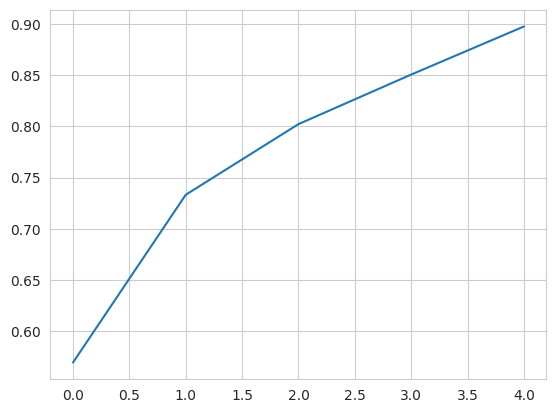

In [ ]:
plt.plot(history.history['accuracy'])

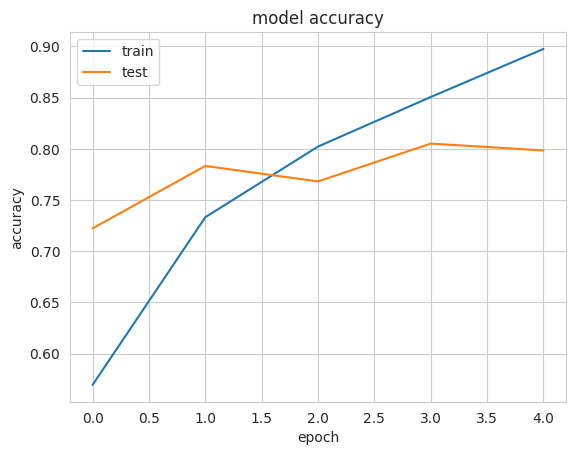

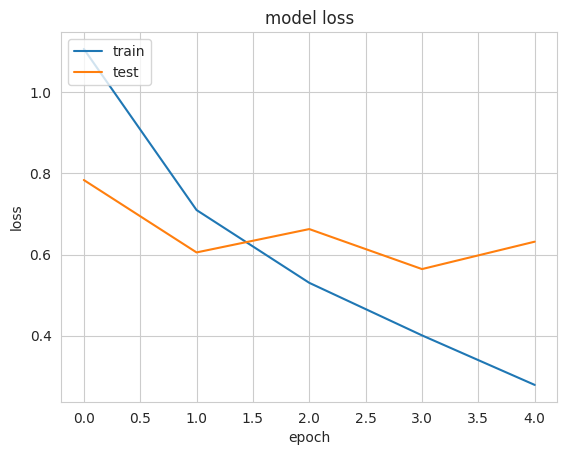

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_image=df_test.iloc[0,0]
test_image
image = load_img(test_image)

In [ ]:
im_array=np.array(image)/255
type(im_array)
im_array.shape

(150, 150, 3)

In [ ]:
new_array=np.expand_dims(im_array,axis=0)
result=model_base.predict(new_array)
result

1/1 [==============================] - 0s 231ms/step


array([[1.1048759e-03, 3.2463751e-05, 3.8760336e-06, 1.6936122e-08,
        1.8162791e-06, 9.9885702e-01]], dtype=float32)

In [ ]:
result2=model_base.predict(val_gen)
result2=model_test_base.predict(val_gen)

71/71 [==============================] - 7s 93ms/step


In [ ]:
pred=np.argmax(result2)
actual=valid_df['labels']


In [ ]:
y_pred=np.argmax(result2, axis=1)
y_pred

array([0, 3, 0, ..., 3, 2, 4])

In [ ]:
print(val_gen.class_indices)
result=val_gen.classes
print(result)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
[1, 2, 3, 5, 3, 3, 1, 0, 5, 4, 2, 5, 0, 3, 1, 5, 1, 5, 1, 1, 2, 1, 0, 3, 2, 4, 0, 1, 1, 5, 1, 1, 1, 4, 0, 1, 2, 4, 4, 2, 1, 1, 2, 3, 1, 1, 1, 5, 1, 2, 0, 3, 3, 0, 2, 2, 2, 1, 4, 5, 4, 1, 0, 1, 4, 2, 1, 5, 0, 3, 0, 4, 3, 3, 0, 2, 2, 5, 1, 3, 0, 1, 2, 1, 5, 3, 1, 5, 4, 0, 2, 4, 1, 2, 3, 0, 2, 3, 5, 3, 1, 0, 1, 5, 0, 0, 2, 1, 5, 5, 1, 3, 3, 4, 5, 2, 3, 4, 5, 1, 0, 0, 4, 1, 0, 0, 2, 2, 2, 1, 2, 3, 5, 4, 2, 3, 5, 3, 0, 0, 4, 4, 2, 0, 5, 0, 1, 2, 4, 0, 2, 1, 2, 1, 3, 3, 5, 2, 5, 2, 5, 3, 0, 1, 4, 3, 4, 3, 3, 4, 3, 0, 3, 5, 2, 1, 4, 2, 4, 3, 4, 1, 2, 5, 3, 5, 0, 3, 4, 5, 0, 2, 0, 2, 5, 3, 1, 1, 1, 0, 3, 1, 4, 5, 4, 2, 3, 4, 5, 4, 3, 2, 3, 1, 3, 1, 5, 3, 0, 5, 5, 3, 4, 0, 5, 0, 2, 5, 4, 1, 1, 0, 3, 4, 5, 5, 2, 1, 5, 0, 1, 5, 2, 4, 1, 1, 1, 2, 4, 0, 4, 1, 3, 0, 5, 0, 3, 3, 1, 1, 4, 5, 2, 1, 3, 5, 3, 4, 2, 4, 2, 0, 4, 2, 2, 5, 0, 5, 0, 5, 2, 1, 4, 3, 4, 2, 4, 2, 1, 1, 5, 2, 5, 0, 4, 2, 2, 3, 5, 5, 5, 5, 5, 1, 3, 4,

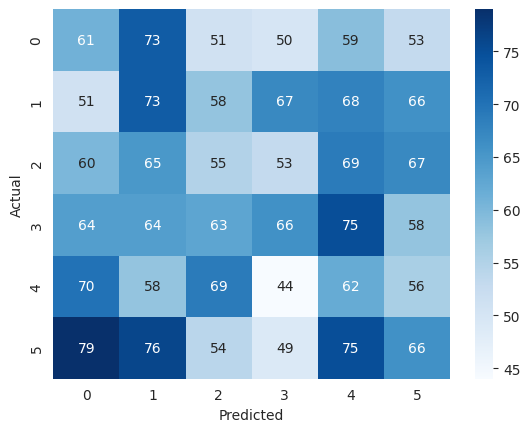

In [ ]:
conf_matrix = confusion_matrix(result, y_pred)
# Display confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy_on_valid=np.sum(np.diag(conf_matrix))/np.sum(conf_matrix)
print(accuracy_on_valid)

0.17044948820649755


In [ ]:
# Now new Code

In [ ]:
import time
model_better=get_model_alex()
start = time.time()
model_better.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_better.fit(train_gen, epochs=10, validation_data=val_gen)
end = time.time()
performance=end-start
print(performance)
# time

Epoch 1/10
281/281 [==============================] - 34s 117ms/step - loss: 1.0649 - accuracy: 0.5939 - val_loss: 0.8912 - val_accuracy: 0.6613
Epoch 2/10
281/281 [==============================] - 33s 116ms/step - loss: 0.7202 - accuracy: 0.7292 - val_loss: 0.6472 - val_accuracy: 0.7672
Epoch 3/10
281/281 [==============================] - 33s 117ms/step - loss: 0.5556 - accuracy: 0.7934 - val_loss: 0.6943 - val_accuracy: 0.7410
Epoch 4/10
281/281 [==============================] - 34s 120ms/step - loss: 0.4311 - accuracy: 0.8421 - val_loss: 0.6311 - val_accuracy: 0.7842
Epoch 5/10
281/281 [==============================] - 33s 118ms/step - loss: 0.3153 - accuracy: 0.8876 - val_loss: 0.5989 - val_accuracy: 0.8100
Epoch 6/10
281/281 [==============================] - 34s 121ms/step - loss: 0.2158 - accuracy: 0.9257 - val_loss: 0.7396 - val_accuracy: 0.7944
Epoch 7/10
281/281 [==============================] - 34s 121ms/step - loss: 0.1628 - accuracy: 0.9429 - val_loss: 0.7771 - val_ac

In [ ]:
model_better.save('model_better.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


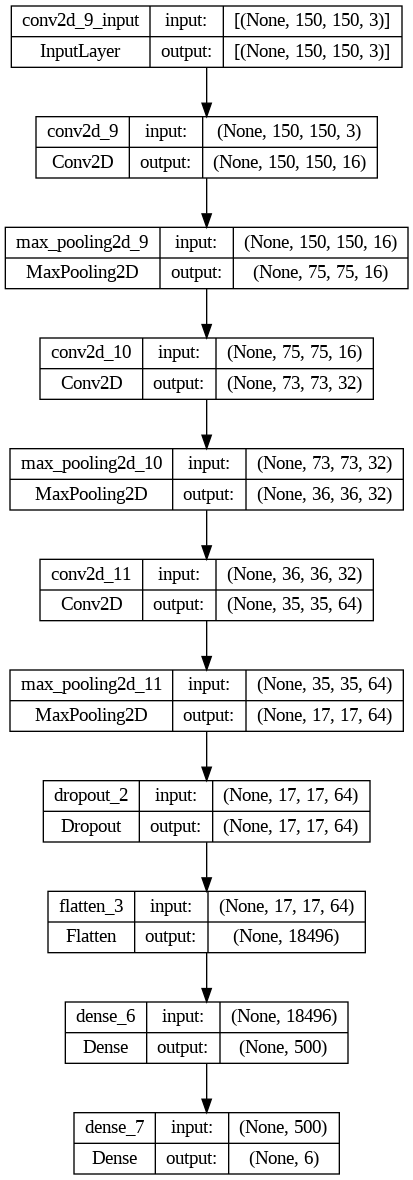

In [ ]:
!pip install keras-vis
from keras.utils import plot_model
plot_model(model_better, to_file='model_better_plot.png', show_shapes=True, show_layer_names=True)

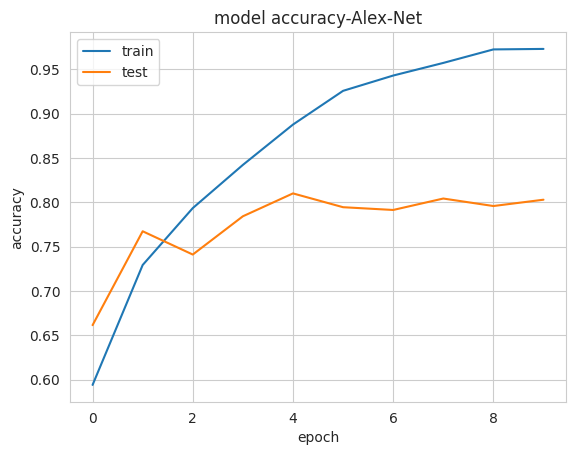

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy-Alex-Net')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

In [ ]:
result3=model_better.predict(val_gen)
result3=model_better.predict(val_gen)

71/71 [==============================] - 7s 95ms/step


In [ ]:
result3.shape
#for each row need to find column which has maximum value

(2247, 6)

Text(50.722222222222214, 0.5, 'Predicted')

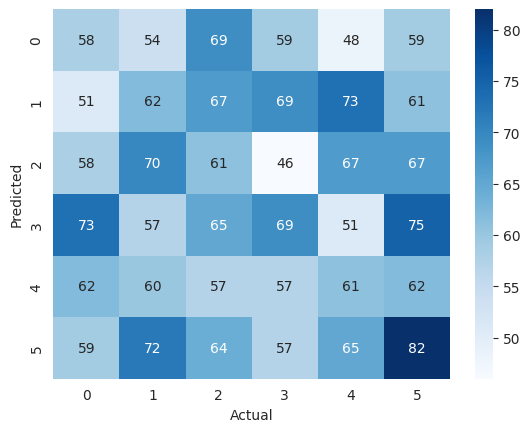

In [ ]:
actual=val_gen.classes
ypred2=np.argmax(result3,axis=1)# arg max against all columns
conf_matrix2=confusion_matrix(actual,ypred2)
sns.heatmap(conf_matrix2,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [ ]:
#accuracy based on confusion matrix
accuracy=np.sum(np.diag(conf_matrix2))/np.sum(conf_matrix2)
print(accuracy)

0.17489986648865152
